<a href="https://colab.research.google.com/github/pyellapu07/Understanding_weights_of_features_MLE_log_reg_Cancer-patents/blob/main/Understanding_weights_of_features_MLE%2C_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

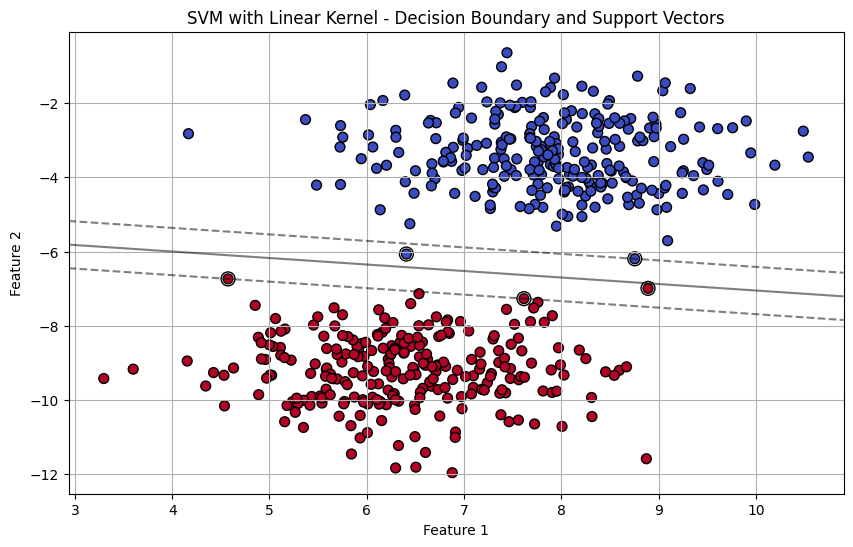

In [10]:
# Another attempt to generate the SVM plot and visualize it
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Create a simple dataset (two classes with some overlap)
X, y = datasets.make_blobs(n_samples=500, centers=2, random_state=6)

# Fit an SVM model to the data
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# Plot the dataset and the decision boundary
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a mesh grid to plot the decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title("SVM with Linear Kernel - Decision Boundary and Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


Class 0 (No Cancer): 100
Class 1 (Cancer): 0


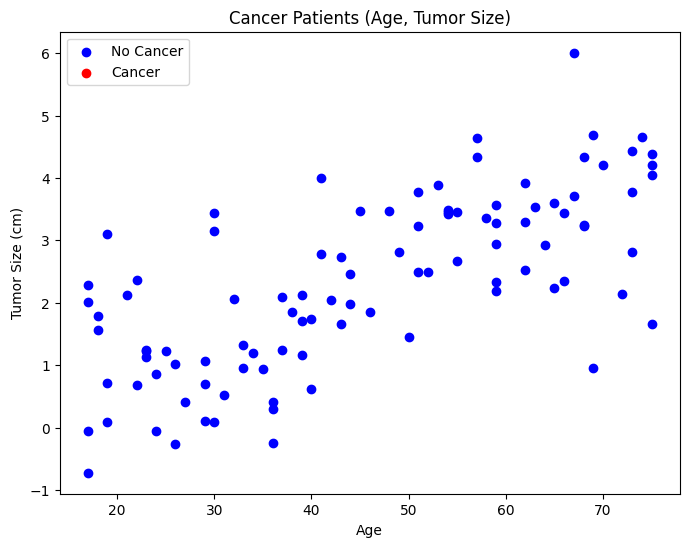

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generate realistic age data (age between 16 and 75)
np.random.seed(42)
ages = np.random.randint(16, 76, 100)

# Generate tumor size based on age (in cm), assuming older patients may have larger tumors
# Tumor size between 0 and 10 cm with some correlation to age
tumor_sizes = 0.05 * ages + np.random.normal(0, 1, 100)  # Adding some noise

# Ensure we have a more balanced dataset by tweaking the threshold for cancer probability
prob_cancer = 1 / (1 + np.exp(-(0.08 * ages + 0.5 * tumor_sizes - 20)))  # Tweaked logistic function
cancer = np.random.binomial(1, prob_cancer)

# Check the balance between the classes
print(f'Class 0 (No Cancer): {np.sum(cancer == 0)}')
print(f'Class 1 (Cancer): {np.sum(cancer == 1)}')

# Combine age and tumor size into a feature matrix
X = np.column_stack((ages, tumor_sizes))
y = cancer

# Plot the data to visualize patients with and without cancer
plt.figure(figsize=(8,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='No Cancer')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Cancer')
plt.title('Cancer Patients (Age, Tumor Size)')
plt.xlabel('Age')
plt.ylabel('Tumor Size (cm)')
plt.legend()
plt.show()

# Fit a logistic regression model to estimate the weights
model = LogisticRegression()
model.fit(X, y)

# Get the estimated weights (coefficients) for the features
weights = model.coef_[0]
intercept = model.intercept_[0]

print


In [2]:
X, y

(array([[ 1.22831184, -0.75717844],
        [ 0.69840909, -1.38029525],
        [ 2.54881729,  2.50225822],
        [ 0.57357881, -1.35297943],
        [ 0.58590018, -1.33745666],
        [ 0.63356167, -1.17278867],
        [ 0.55656344, -1.31038476],
        [ 0.12437227,  0.19896733],
        [ 1.32272135, -0.59340317],
        [ 1.42586898,  1.39002959],
        [ 0.63944087, -1.23395477],
        [ 1.2349949 , -0.73168763],
        [ 0.73902766,  0.82180719],
        [ 2.22140553,  2.10036638],
        [ 3.08402116,  2.83324852],
        [ 1.00183089, -1.02646717],
        [ 1.03307436, -0.85545993],
        [ 0.10320711,  0.21791213],
        [ 0.57885884,  0.56599415],
        [ 1.71073996,  1.56900774],
        [ 1.1586864 , -0.88167436],
        [ 3.07317945,  2.84564176],
        [ 1.88782031, -0.36699364],
        [ 0.48727907,  0.59970882],
        [ 3.07752729,  2.90114736],
        [ 0.22485502,  0.29482153],
        [ 1.12991576,  1.10236134],
        [ 0.85095512, -1.184

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset
file_path = '/content/Cancer_Data.csv'
data = pd.read_csv(file_path)

# Drop the unnecessary column
data = data.drop(columns=['Unnamed: 32', 'id'])

# Encode the target variable (diagnosis)
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])  # Malignant=1, Benign=0

# Separate features and target variable
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Get the coefficients of each feature
coefficients = logreg.coef_

# Pair feature names with their corresponding coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients[0]
})

# Display the coefficients
feature_coefficients

,Feature,Coefficient
0,radius_mean,-0.987964
1,texture_mean,-0.224630
2,perimeter_mean,0.365256
3,area_mean,-0.026037
4,smoothness_mean,0.152864
5,compactness_mean,0.230748
6,concavity_mean,0.518583
7,concave points_mean,0.274977
8,symmetry_mean,0.222364
9,fractal_dimension_mean,0.035786


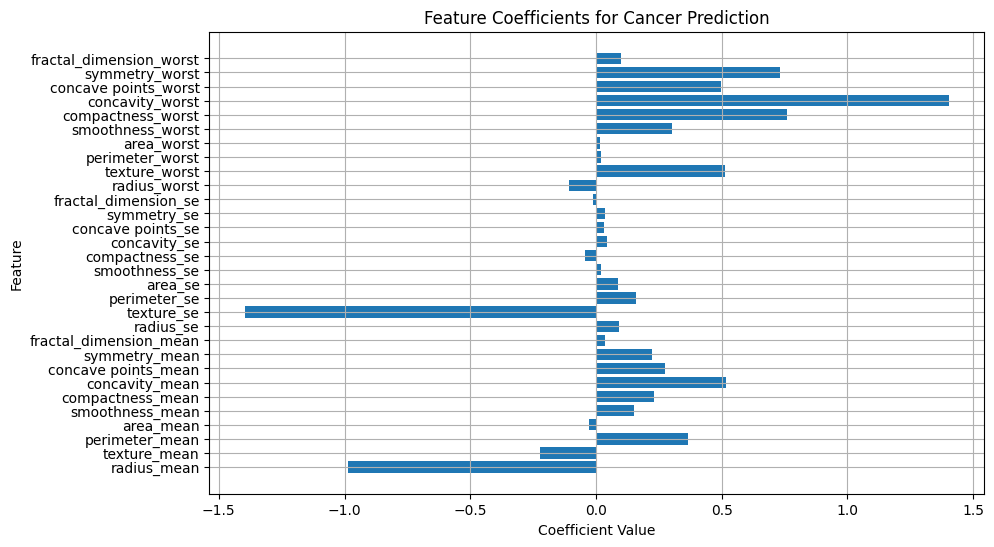

In [11]:
# prompt: Using dataframe feature_coefficients: if the patient having cancer or not vs the feature coeffiients

# Import necessary libraries
import matplotlib.pyplot as plt

# Create a horizontal bar chart to visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients['Feature'], feature_coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients for Cancer Prediction')
plt.grid(True)
plt.show()